In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import f1_score, recall_score, precision_score

import warnings
warnings.filterwarnings("ignore")

<h2> Feature Selection on OnlineNewsPopularity </h2>

Exercise
1. Load the dataset 
2. Drop the Column which isn't required


In [2]:
 # read the csv file from the link provided
 # drop the column that is not required from the dataset(url)
df = pd.read_csv("OnlineNewsPopularity.csv")
df = df.drop("url", axis = 1)
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  float64
 12   data_channel_is_lifestyle      

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


## Data Preprocessing

In [6]:
if df.duplicated().any():
    print("Duplicates found")
    df.drop_duplicates(inplace=True)
    print("Duplicates have been removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [7]:
print(df.isnull().sum())

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

Exercise 
1. Scale the data using a appropriate scaler and re-asign the column names after scaling.
2. The function below should return scaled result in the form of DataFrame

In [8]:
# hint: Use MinMaxScaler for scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()
# df_scaled.shape

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,...,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,0.000702
1,1.0,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,...,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,0.000842
2,1.0,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.0,...,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,0.001778
3,1.0,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.0,...,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,0.001422
4,1.0,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.0,...,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,0.000598


In [9]:
def scaled_dataset(data):
    scaler = MinMaxScaler()
    scaled_dataset = scaler.fit_transform(data)
    df_scaled_data = pd.DataFrame(scaled_dataset, columns=data.columns)
    return df_scaled_data

df_function_data = scaled_dataset(df_scaled)
df_function_data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,...,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,0.000702
1,1.0,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,...,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,0.000842
2,1.0,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.0,...,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,0.001778
3,1.0,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.0,...,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,0.001422
4,1.0,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.0,...,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,0.000598


### Convert the continous target column to discrete values:

In [10]:
continuous_cols = df_scaled.columns[1:59]

for col in continuous_cols:
    df_scaled[col] = pd.cut(df_scaled[col], bins=5, labels=False)
    
df_scaled = pd.DataFrame(df_scaled, columns=df_scaled.columns)
df_scaled.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.0,2,0,0,0,0,0,0,0,0,...,0,3,3,1,3,2,2,0,0,0.000702
1,1.0,1,0,0,0,0,0,0,0,0,...,0,3,4,4,4,0,2,4,0,0.000842
2,1.0,1,0,0,0,0,0,0,0,0,...,0,4,2,0,4,0,2,4,0,0.001778
3,1.0,1,0,0,0,0,0,0,0,0,...,0,3,3,1,4,0,2,4,0,0.001422
4,1.0,2,0,0,0,0,0,0,0,0,...,0,4,3,2,4,2,2,0,0,0.000598


5. Perform train_test_split

In [11]:
X = df_scaled.loc[:,:' abs_title_sentiment_polarity']
y = df_scaled[' shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train =y_train.astype('int')

In [12]:
X_train.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [13]:
X_train.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
34165,0.117566,2,0,0,0,0,0,0,0,0,...,1,0,3,3,0,4,1,2,2,0
21102,0.424620,1,0,0,0,0,0,0,0,0,...,1,0,3,4,3,4,0,2,4,0
31747,0.171508,1,0,0,0,0,0,0,0,0,...,2,0,4,4,3,4,0,2,2,0
8361,0.782849,2,0,0,0,0,0,0,0,0,...,1,0,2,4,4,4,0,2,4,0
11122,0.706777,1,0,0,0,0,0,0,0,0,...,1,0,2,2,0,4,2,3,0,2


6. Write a function which returns the list of k-Best features where k being the number of features required

In [14]:
def best_features(X_train, y_train, X_test, k):
    k_best = SelectKBest(chi2, k=k)
    k_best.fit(X_train, y_train)

    X_train_selected = k_best.transform(X_train)
    X_test_selected = k_best.transform(X_test)

    i = k_best.get_support(indices=True)
    feature_names = list(X_train.columns[i])

    return feature_names

Print the results

In [15]:
k_best_features = best_features(X_train, y_train, X_test, k=10)
print(k_best_features)

[' data_channel_is_entertainment', ' data_channel_is_tech', ' data_channel_is_world', ' kw_avg_max', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' LDA_02', ' LDA_03', ' title_subjectivity']


<h3>Describe about feature selection and explain your code in detail?</h3>


<div><b>Answer: </b>The process of choosing a subset of pertinent characteristics from a larger set of features to be utilized in model training is known as feature selection. This procedure can lessen overfitting, enhance model performance, and simplify the model's computations. The dataframe has been scaled using minmaxscaler to elimate the negative values in the dataste and been split to training and testing dataframes and the required <b>X_train</b> and <b>y_train</b> is subjected to a chi2 statistical test, and the top k features are chosen based on the chi2 scores.
<br><br>   
    The function <b>best_features</b> takes as input - the training data features <b>X_train</b>, training data target <b>y_train</b>, testing data features <b>X_test</b>, and the number of features required <b>k</b>.
<br><br>
    The <b>SelectKBest</b> object is created using the chi2 scoring function with k-best features as the parameter.
The <b>fit</b> method is called on the <b>k_best</b> object with the training data features and target as input. This fits the selector to the training data and computes the chi2 test scores for each feature and the transform method transforms the training and testing data by selecting the k-best features based on the chi2 test scores. The <b>get_support</b> method is called on the k_best object to get the indices of the selected features.
<br><br>    
Finally, The feature names are extracted from the selected indices and returned as output as a list. </div>
    



<h2> Model selection on Algerian_forest_fires_dataset_UPDATE-1 dataset  </h2>
<h3># Exercise (Hint use Logistic Regression, SVC, Ridge and Lasso to compare the models.)</h3>
<h4>LinearSVC  Vs  Logistic regression</h4>
<p>Your task is to findout which of the above models is best suited for the given dataset and give reasons in this scenario. </p>
<p>Also, you need to give scenarios which each of these Models work better over the other.</p>


1. Load the dataset

In [16]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE-1.csv")
data.head()

,Bejaia Region Dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [17]:
data.shape

(247, 14)

In [18]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE-1.csv", header = 1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [19]:
data.shape

(246, 14)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [21]:
df = data.loc[124:] 
df = pd.concat([data.loc[:120], data.loc[125:]])
df['Classes  '] = df['Classes  '].str.strip()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    object
 1   month        242 non-null    object
 2   year         242 non-null    object
 3   Temperature  242 non-null    object
 4    RH          242 non-null    object
 5    Ws          242 non-null    object
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
dtypes: object(14)
memory usage: 28.4+ KB


In [23]:
df.describe().T

,count,unique,top,freq
day,242,31,16,8
month,242,4,7,62
year,242,1,2012,242
Temperature,242,19,35,29
RH,242,62,64,10
Ws,242,18,14,42
Rain,242,39,0,133
FFMC,242,171,88.9,8
DMC,242,166,7.9,5
DC,242,198,8,5


In [24]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [25]:
# df[df['Classes  '].isnull()].index.tolist()

In [26]:
# df.loc[[167]]

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Classes  '])
df['Classes  '] = le.transform(df['Classes  '])
df = df.drop(index=[167])

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1


In [29]:
copy_df = df.copy()
copy_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1


* Drop the unnecessary columns and use train_test_split

In [30]:
scaler2 = MinMaxScaler()
scaled_data2 = scaler2.fit_transform(copy_df)
df_scaled2 = pd.DataFrame(scaled_data2, columns=copy_df.columns)
df_scaled2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0.000000,0.0,0.0,0.35,0.521739,0.521739,0.000000,0.550445,0.041411,0.003279,0.068421,0.034380,0.016077,1.0
1,0.033333,0.0,0.0,0.35,0.579710,0.304348,0.077381,0.531157,0.052147,0.003279,0.052632,0.041854,0.012862,1.0
2,0.066667,0.0,0.0,0.20,0.884058,0.695652,0.779762,0.274481,0.027607,0.000937,0.015789,0.023916,0.003215,1.0
3,0.100000,0.0,0.0,0.15,0.985507,0.304348,0.148810,0.000000,0.009202,0.000000,0.000000,0.008969,0.000000,1.0
4,0.133333,0.0,0.0,0.25,0.811594,0.434783,0.000000,0.537092,0.035276,0.034192,0.063158,0.041854,0.016077,1.0


In [31]:
df = df_scaled2.drop(['day', 'month','year'], axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0.35,0.521739,0.521739,0.000000,0.550445,0.041411,0.003279,0.068421,0.034380,0.016077,1.0
1,0.35,0.579710,0.304348,0.077381,0.531157,0.052147,0.003279,0.052632,0.041854,0.012862,1.0
2,0.20,0.884058,0.695652,0.779762,0.274481,0.027607,0.000937,0.015789,0.023916,0.003215,1.0
3,0.15,0.985507,0.304348,0.148810,0.000000,0.009202,0.000000,0.000000,0.008969,0.000000,1.0
4,0.25,0.811594,0.434783,0.000000,0.537092,0.035276,0.034192,0.063158,0.041854,0.016077,1.0


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,241.0,0.509129,0.180681,0.0,0.400000,0.500000,0.650000,1.0
RH,241.0,0.593301,0.215109,0.0,0.449275,0.608696,0.753623,1.0
Ws,241.0,0.413675,0.122275,0.0,0.347826,0.391304,0.478261,1.0
Rain,241.0,0.045273,0.119709,0.0,0.000000,0.000000,0.029762,1.0
FFMC,241.0,0.733898,0.210500,0.0,0.652819,0.817507,0.885757,1.0
DMC,241.0,0.216016,0.190059,0.0,0.078221,0.162577,0.309816,1.0
DC,241.0,0.200824,0.223474,0.0,0.036534,0.124122,0.300234,1.0
ISI,241.0,0.251496,0.218549,0.0,0.073684,0.184211,0.384211,1.0
BUI,241.0,0.234790,0.212692,0.0,0.074738,0.170404,0.325859,1.0
FWI,241.0,0.228056,0.239383,0.0,0.025723,0.151125,0.372990,1.0


In [33]:
feature = df.columns
feature

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  '],
      dtype='object')

## Checking for outliers

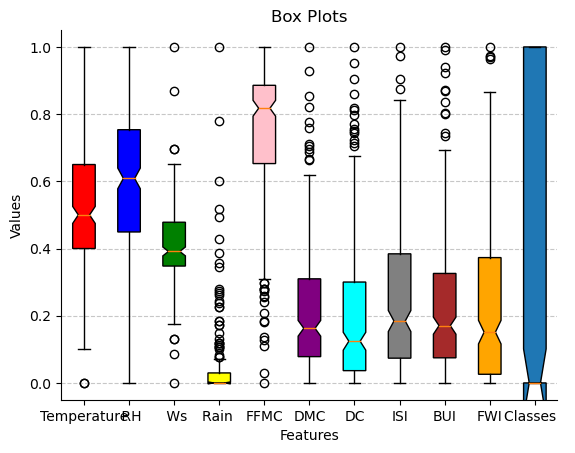

In [34]:
colors = ['red','blue','green','yellow','pink','purple','cyan','grey','brown','orange']
features = feature

fig,ax = plt.subplots()
bp = ax.boxplot([df[f] for f in features],
                sym = 'o',
                patch_artist = True,
                notch = True)

for patch, color in zip(bp['boxes'], colors[:len(features)]):
    patch.set_facecolor(color)
    
ax.set_xticklabels(features)
ax.set_title("Box Plots")
ax.set_xlabel("Features")
ax.set_ylabel("Values")

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Correcting the outliers

In [35]:
pct_lower = 0.01
pct_upper = 0.95

df['Temperature'] = np.clip(df['Temperature'],
                            df['Temperature'].quantile(pct_lower),
                            df['Temperature'].quantile(pct_upper))
df[' RH'] = np.clip(df[' RH'],
                    df[' RH'].quantile(pct_lower),
                    df[' RH'].quantile(pct_upper))
df[' Ws'] = np.clip(df[' Ws'],
                    df[' Ws'].quantile(pct_lower),
                    df[' Ws'].quantile(pct_upper))
df['Rain '] = np.clip(df['Rain '],
                      df['Rain '].quantile(pct_lower),
                      df['Rain '].quantile(pct_upper))
df['FFMC'] = np.clip(df['FFMC'],
                     df['FFMC'].quantile(pct_lower),
                     df['FFMC'].quantile(pct_upper))
df['DMC'] = np.clip(df['DMC'],
                    df['DMC'].quantile(pct_lower),
                    df['DMC'].quantile(pct_upper))
df['DC'] = np.clip(df['DC'],
                   df['DC'].quantile(pct_lower),
                   df['DC'].quantile(pct_upper))
df['ISI'] = np.clip(df['ISI'],
                    df['ISI'].quantile(pct_lower),
                    df['ISI'].quantile(pct_upper))
df['BUI'] = np.clip(df['BUI'],
                    df['BUI'].quantile(pct_lower),
                    df['BUI'].quantile(pct_upper))
df['FWI'] = np.clip(df['FWI'],
                    df['FWI'].quantile(pct_lower),
                    df['FWI'].quantile(pct_upper))                          
                            

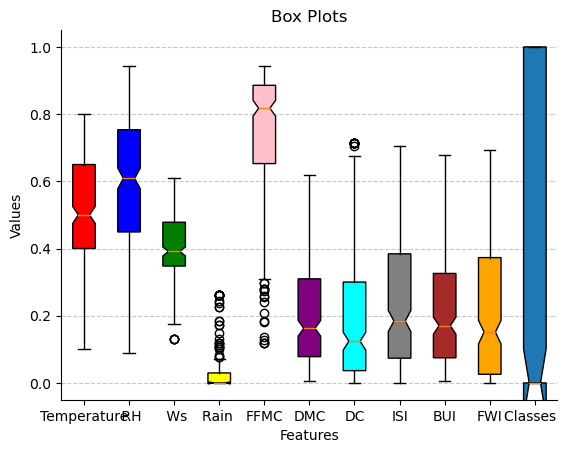

In [36]:
colors = ['red','blue','green','yellow','pink','purple','cyan','grey','brown','orange']
features = feature

fig,ax = plt.subplots()
bp = ax.boxplot([df[f] for f in features],
                sym = 'o',
                patch_artist = True,
                notch = True)

for patch, color in zip(bp['boxes'], colors[:len(features)]):
    patch.set_facecolor(color)
    
ax.set_xticklabels(features)
ax.set_title("Box Plots")
ax.set_xlabel("Features")
ax.set_ylabel("Values")

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Classes  ', axis=1), 
                                                    df['Classes  '], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [38]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
115,0.35,0.637681,0.565217,0.035714,0.589021,0.073620,0.038876,0.078947,0.070254,0.022508
205,0.55,0.231884,0.434783,0.000000,0.943620,0.619632,0.712881,0.689474,0.678625,0.694534
216,0.60,0.724638,0.347826,0.261905,0.532641,0.039877,0.010304,0.052632,0.035874,0.012862
132,0.40,0.449275,0.391304,0.119048,0.648368,0.164110,0.004215,0.073684,0.146487,0.028939
84,0.60,0.623188,0.347826,0.000000,0.894659,0.610429,0.712881,0.473684,0.678625,0.672026


In [39]:
X_train.shape

(192, 10)

Apply Logistic Regression, SVC, Ridge and Lasso to compare the models.

## Logistic Regression

,Metrics,Scores
0,Accuracy,0.959184
1,Precision,0.950000
2,Recall,0.950000
3,F1-Score,0.950000


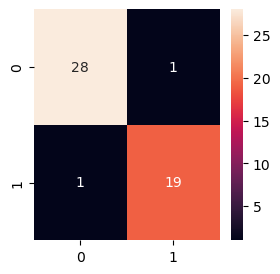

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True)

tab = {'Metrics': ['Accuracy','Precision','Recall','F1-Score'],
      'Scores': [acc,prec,rec,f1]}
df_eval = pd.DataFrame(tab)
df_eval

## SVC

,Metrics,Scores
0,Accuracy,0.959184
1,Precision,0.950000
2,Recall,0.950000
3,F1-Score,0.950000


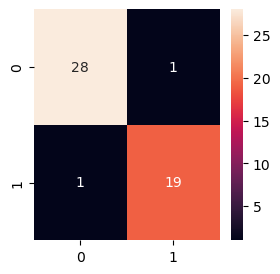

In [41]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)

acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)

cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True)

tab2 = {'Metrics': ['Accuracy','Precision','Recall','F1-Score'],
      'Scores': [acc2,prec2,rec2,f12]}
df_eval2 = pd.DataFrame(tab2)
df_eval2

## Linear regression

In [42]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred4 = linear.predict(X_test)

linear_score = linear.score(X_test, y_test)
mse2 = mean_squared_error(y_test, y_pred4)

print("Linear Regression Model Accuracy:", linear_score)
print("Linear Regression Model Mean Squared Error:", mse2)

Linear Regression Model Accuracy: 0.655414313652396
Linear Regression Model Mean Squared Error: 0.0832401907878427


## Ridge and Lasso Regression

In [43]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
ridge_score = ridge.score(X_test, y_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression Model Accuracy:", ridge_score)
print("Ridge Regression Model Mean Squared Error:", ridge_mse)

Ridge Regression Model Accuracy: 0.6686511162800926
Ridge Regression Model Mean Squared Error: 0.0800426291368373


In [44]:
lasso = Lasso(alpha=.0)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

lasso_score = lasso.score(X_test, y_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print("Lasso Regression Model Accuracy:", lasso_score)
print("Lasso Regression Model Mean Squared Error:", lasso_mse)

Lasso Regression Model Accuracy: 0.6554295607980576
Lasso Regression Model Mean Squared Error: 0.0832365075956379


It is seen that the MSE of the Lasso regression model is less than that of the linear regression model, it means that the Lasso regression model has performed better than the linear regression model in terms of prediction accuracy on the testing data. A lower MSE indicates that the predicted values are closer to the actual values, and hence the model has better accuracy in predicting the target variable. 